# Aprendizaje Supervisado

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mainpath = "../Datasets/"
filename = "HVAC_limpio.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HVAC_limpio", index_col=0)
data

POTENCIA TRAFO 2  POTENCIA TRAFO 3  POTENCIA TRAFO 4  POTENCIA TRAFO 5  \
0              0.783603         38.338665        232.182602        235.755234   
1              0.926969         38.338665        197.970230        113.384056   
2              0.793163         38.455196        211.676941        236.968918   
3              0.860073         38.688263        206.066818        298.481995   
4              0.812257         38.688263        193.984100        292.789215   
5              0.888717         38.688263        190.300995        279.843140   
6              0.802738         38.688263        176.961700        292.683258   
7              0.831385         38.688263        176.713120        269.536377   
8              0.802729         38.688263        176.003754        241.409500   
9              0.898297         38.688263        177.443466        202.532761   
10             0.764496         38.688263        169.305801        180.715164   
11             0.840958         38.688263        161.426788        175.282440   
12             0.907860         38.688263        158.233215        171.063416   
13             0.850489         38.688263        158.396393        139.911942   
14             0.793161         38.688263        155.832214        161.296066   
15             0.860039         38.688263        157.370712        143.398895   
16             0.860057         38.688263        154.542343        140.326141   
17             0.821814         38.688263        132.241760        142.946167   
18             0.802738         38.688263        113.787430        136.136002   
19             0.649816         38.090073        107.602318        146.953293   
20             0.764503         38.804790        107.563461        133.959061   
21             0.688040         38.804790        105.154694        141.183426   
22             0.659378         38.804790        105.582047        129.817093   
23             0.688053         38.804790        105.193542        140.827026   
24             0.707171         38.804790        105.815155        138.033600   
25             0.649824         38.804790        104.618546        157.876541   
26             0.678497         38.804790        105.465500        110.715858   
27             0.688048         38.804790        105.923943        149.948990   
28             0.726270         38.804790        109.032043        151.740631   
29             0.630708         38.804790        121.262398        138.601929   
...                 ...               ...               ...               ...   
79255         21.415659         49.314690        417.187988        426.583954   
79256         21.415659         29.335971        417.279449        424.401367   
79257         21.415659         29.335971        395.240814        449.137482   
79258         21.415659         29.335971        395.086975        462.622833   
79259         21.415659         53.670879        396.458710        435.709290   
79260         21.415659         50.025482        410.882324        418.882507   
79261         21.415659         29.335971        445.781708        433.069397   
79262         21.415659         29.335971        419.461700        424.978180   
79263         21.415659         54.136429        397.319122        428.293671   
79264         21.415659         50.777836        382.895508        424.614410   
79265         21.415659         29.335971        385.904907        415.146088   
79266         21.415659         54.223717        390.128082        420.659760   
79267         21.415659         36.217037        396.255005        453.045380   
79268         21.415659         33.739662        401.184845        450.327515   
79269         46.193169         30.085953        394.035370        461.874512   
79270         30.842216         27.820570        383.951294        445.115265   
79271         28.067196         30.081797        375.176575        455.040894   
79272         29.345577         25.966

## Modelos de Clasificación

In [4]:
data2 = data
data2["label_cop_carlos"] = (data2["C_O_P BOMBA CALOR CARLOS"] > 3.5) & (data2["C_O_P BOMBA CALOR CARLOS"] < 4.5)
data2["label_cop_felipe"] = (data2["C_O_P BOMBA CALOR FELIPE"] > 3.5) & (data2["C_O_P BOMBA CALOR FELIPE"] < 4.5)
data2["label_cop_frio_1"] = (data2["C_O_P MÁQUINA GRUPO FRÍO 1"] > 3.5) & (data2["C_O_P MÁQUINA GRUPO FRÍO 1"] < 4.5)
data2["label_cop_frio_2"] = (data2["C_O_P MÁQUINA GRUPO FRÍO 2"] > 3.5) & (data2["C_O_P MÁQUINA GRUPO FRÍO 2"] < 4.5)

### Conjunto de entrenamiento y conjunto de testing

In [5]:
variables_a_eliminar = ["label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = data2.columns.values.tolist()

subLista = [x for x in lista_variables if x not in variables_a_eliminar]
y_columns = ["label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]

X = data2[subLista]
y = data2[y_columns]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
len(X_test)

23786

### Árbol de decisión

In [7]:
from sklearn import tree

# Instantiate mode
model = tree.DecisionTreeClassifier()

# Train the model on training data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
from sklearn.metrics import accuracy_score

# accuracy_score
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9994114184814596

In [9]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree.dot -o tree.png  '
os.system(myCmd)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [11]:
# accuracy_score
rf.oob_score_

0.9991846699940539

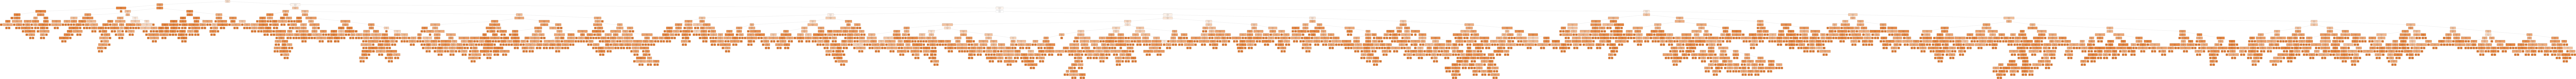

In [12]:
# Extract single tree
estimator = rf.estimators_[5]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='treeRF.dot', 
                feature_names = X.columns,
                class_names = y.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

myCmd = 'dot -Tpng treeRF.dot -o treeRF.png  '
os.system(myCmd)

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'treeRF.png')

## Modelos de Prediccion